In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # for splitting data into train and test

# read in titanic data
df_og = pd.read_csv(r'C:\Users\amkb2\Downloads\titanic\train.csv')
df_og.head()

In [ ]:
# split the data into train and test ,for eg:remove any non-numeric columns
X,y = df_og.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked']),df_og['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print('size of X_train')
print(X_train.shape)
print('size of X_test')
print(X_test.shape)

In [29]:
X_train['Survived'].mean()

0.3724832214765101

In [ ]:
(X_train.groupby(['Sex','Pclass']).Survived.mean())

In [ ]:
(X_train.groupby(['Sex','Pclass']).Survived.count())

<Axes: >

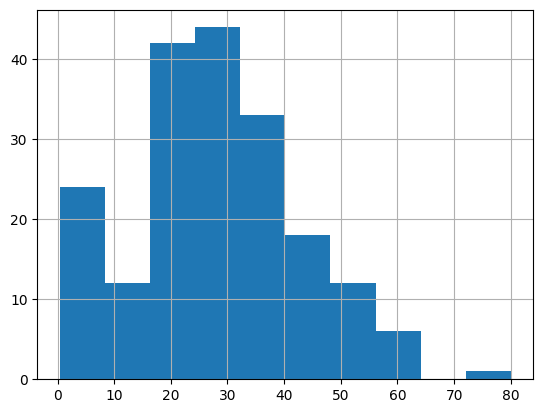

In [30]:
X_train[X_train['Survived']==1]['Age'].hist()

Building Heuristic Model

In [23]:
from hulearn.classification import FunctionClassifier
# with this function i'am going to build a function that uses a heuristic to predict
def sex_pclass(dataf):
    """
    The prediction is that women and children are going to survive
    """
    women_rule = (dataf['Pclass']<3.0) & (dataf['Sex']=='female')
    children_rule = (dataf['Pclass']<3.0) & (dataf['Age']<=15)
    pred = women_rule | children_rule

    return np.array(pred).astype(int)
heuristic_model = FunctionClassifier(sex_pclass)

In [ ]:
sex_pclass(X_train)[0:10]

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

preds = heuristic_model.fit(X_train,y_train).predict(X_train)
print('accuracy:'+ str(accuracy_score(y_train,preds)))
print('precision:'+ str(precision_score(y_train,preds)))
print('recall:'+ str(recall_score(y_train,preds)))
print('f1:'+ str(f1_score(y_train,preds)))
print('confusion_matrix')
print(confusion_matrix(y_train,preds))

In [ ]:
# now see how the rule works on test set
preds = heuristic_model.fit(X_train,y_train).predict(X_test)
print('accuracy:'+ str(accuracy_score(y_test,preds)))
print('precision:'+ str(precision_score(y_test,preds)))
print('recall:'+ str(recall_score(y_test,preds)))
print('f1:'+ str(f1_score(y_test,preds)))
print('confusion_matrix')
print(confusion_matrix(y_test,preds))